In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
import math

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# Add path for the image you want to predict the disease
img_path="C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\101.JPG"

# Load the image and resize it to match input size defined as per the model
img = image.load_img(img_path, target_size=(224,224))

# Convert image into array 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize pixel values in the range of 0 and 1
img_array /= 255.0

# Load the model saved on local into 'model'
model = tf.keras.models.load_model("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\cnn.h5")

# Make predictions on Image and get index with highest predicted probability
pred = model.predict(img_array)
pred_index = np.argmax(pred)
pred_class = class_labels[pred_index]

# Print the Predictions along with the image
print(f"Predicted Class Name : {pred_class}")
plt.imshow(plt.imread(img_path))



1/1 [==============================] - 0s 224ms/step


NameError: name 'class_labels' is not defined

In [8]:
# ImageDataGenerator for training data with augmentation and validation split
train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)

# ImageDataGenerator for testing data with rescaling and augmentation
test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [6]:
class_labels = ['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [7]:
train_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train"
valid_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val"

In [9]:
# Creating a data generator for training data using train_datagen
train_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [10]:
# Creating a data generator for validation data using train_datagen
val_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [11]:
# Creating a data generator for test data using test_datagen
test_gen = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 984 images belonging to 10 classes.


In [13]:
# Steps needed to iterate through entire dataset (math.ciel to make it a round number)
test_steps_per_epoch = math.ceil(test_gen.samples / test_gen.batch_size)
# Get predicted classes for Confusion Matrix
predictions = model.predict(test_gen, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions,axis=1)

31/31 [==============================] - 16s 513ms/step


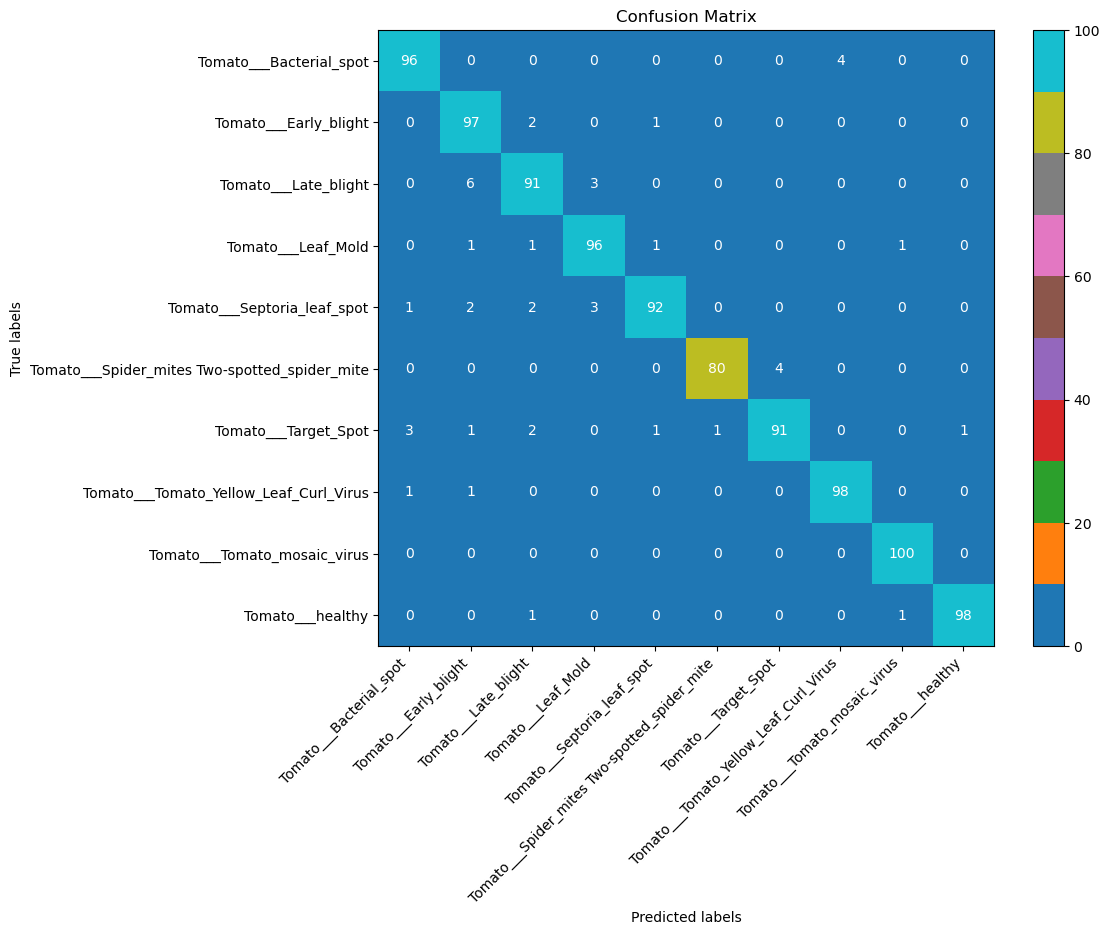

In [14]:
# Get the confusion matrix
conf_matrix = confusion_matrix(test_gen.classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.tab10)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, ha='right')  # Rotate labels for better alignment
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')

plt.show()


1/1 [==============================] - 0s 73ms/step
Predicted Class Name : Tomato___Tomato_Yellow_Leaf_Curl_Virus


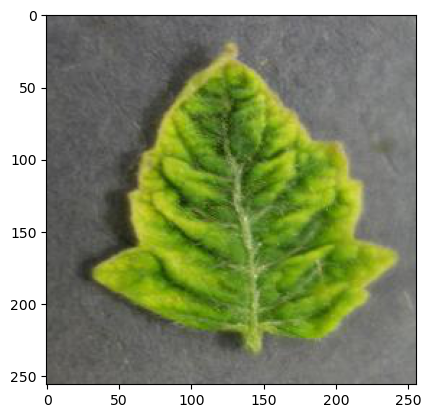

In [32]:
# Add path for the image you want to predict the disease
img_path="C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\101.JPG"

# Load the image and resize it to match input size defined as per the model
img = image.load_img(img_path, target_size=(224,224))

# Convert image into array 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize pixel values in the range of 0 and 1
img_array /= 255.0

# Load the model saved on local into 'model'
model = tf.keras.models.load_model("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\cnn.h5")

# Make predictions on Image and get index with highest predicted probability
pred = model.predict(img_array)
pred_index = np.argmax(pred)
pred_class = class_labels[pred_index]

# Print the Predictions along with the image
print(f"Predicted Class Name : {pred_class}")
plt.imshow(plt.imread(img_path))


1/1 [==============================] - 0s 38ms/step


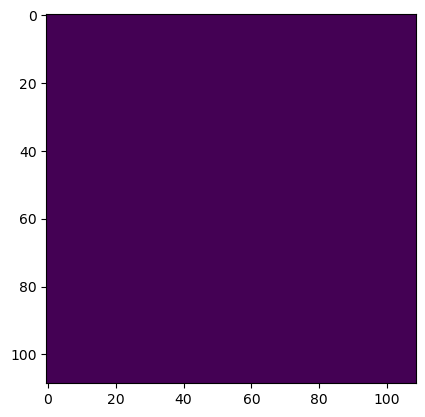

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Replace 'layer_name' with the name of the layer you want to visualize
layer_name = 'conv2d_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Get intermediate layer activations
activations = intermediate_layer_model.predict(img_array)

# Visualize the activations
plt.imshow(activations[0, :, :, 0], cmap='viridis')  # Adjust the index for different channels
plt.show()


In [35]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models

# Load and preprocess an example image
#img_path = "path/to/your/image.jpg"
#img = image.load_img(img_path, target_size=(224, 224))
#img_array = image.img_to_array(img)
#img_array = np.expand_dims(img_array, axis=0)

# Load your pre-trained model
#model = models.load_model("path/to/your/model.h5")

# Get intermediate layer activations
layer_outputs = [layer.output for layer in model.layers[:5]]  # Adjust the number as needed
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_array)

# Visualize intermediate layer activations
layer_names = [layer.name for layer in model.layers[:5]]  # Adjust the number as needed

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    # Visualization code (as in the previous message)
    # ...
    plt.show()


1/1 [==============================] - 0s 48ms/step


In [36]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models

# Load and preprocess an example image

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Load your pre-trained model
#model = models.load_model("path/to/your/model.h5")

# Get intermediate layer activations
layer_outputs = [layer.output for layer in model.layers[:5]]  # Adjust the number as needed
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_array)

# Visualize intermediate layer activations
layer_names = [layer.name for layer in model.layers[:5]]  # Adjust the number as needed

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    # Visualization code (as in the previous message)
    # ...
    plt.show()
print(layer_index)

1/1 [==============================] - 0s 47ms/step
0


C:\Users\Niranjan\AppData\Local\Temp\ipykernel_17736\1812687617.py:20: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
C:\Users\Niranjan\AppData\Local\Temp\ipykernel_17736\1812687617.py:23: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


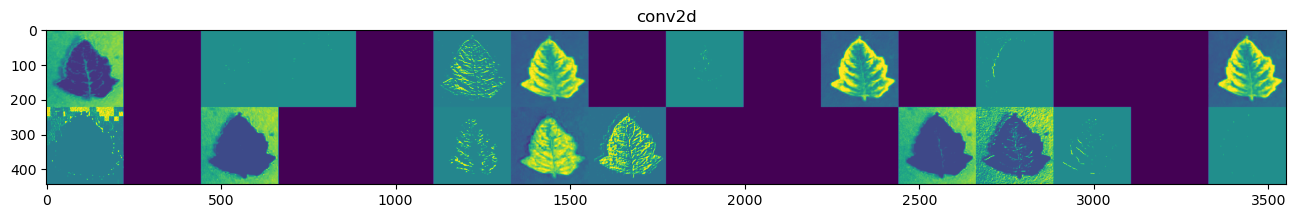

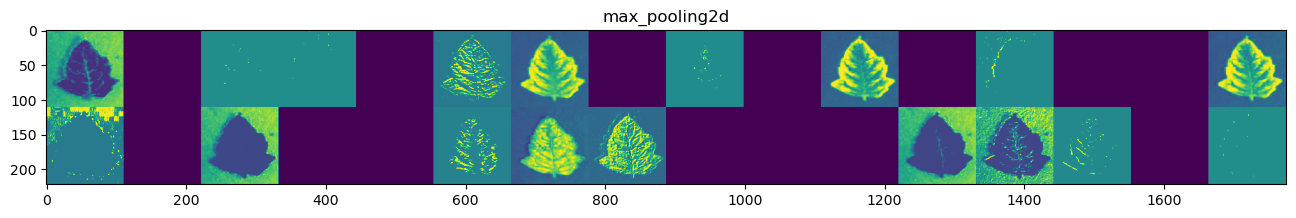

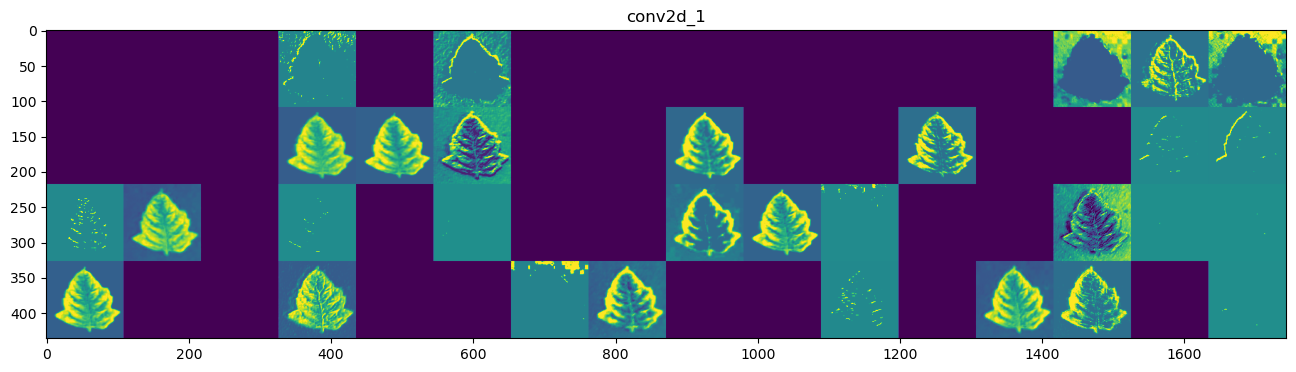

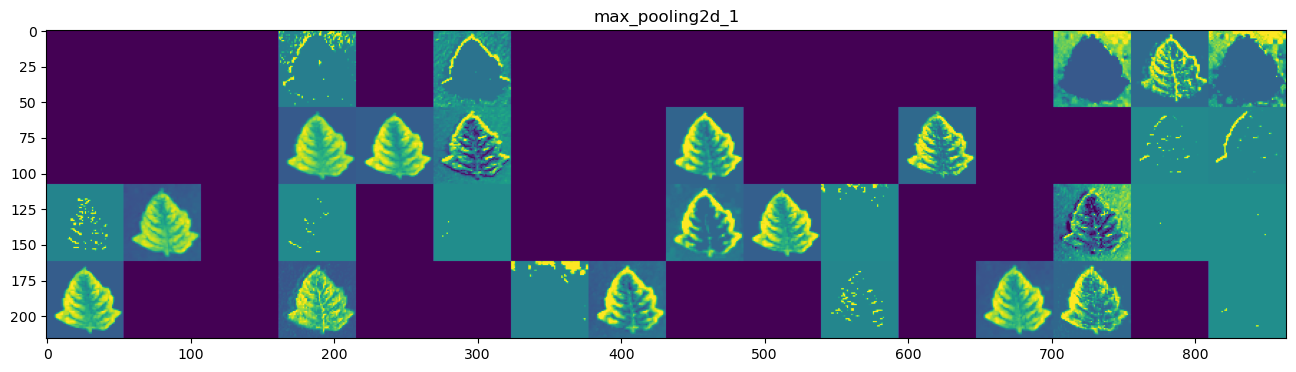

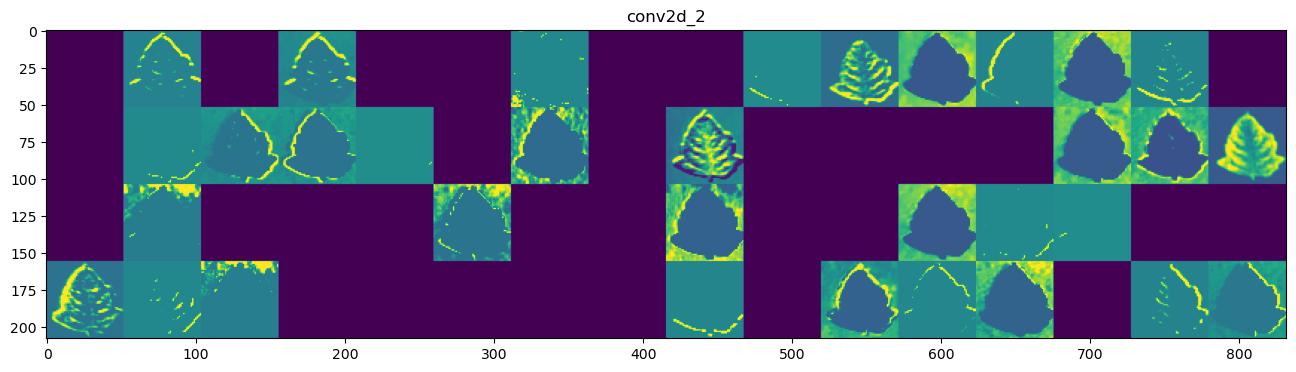

In [37]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # Ensure the activation tensor has the expected shape
    if len(layer_activation.shape) == 4:
        n_features = layer_activation.shape[-1]  # Number of features in the feature map
        size = layer_activation.shape[1]         # The feature map has shape (1, size, size, n_features)
        n_cols = n_features // images_per_row    # Tiles the activation channels in this matrix

        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()  # Post-process the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


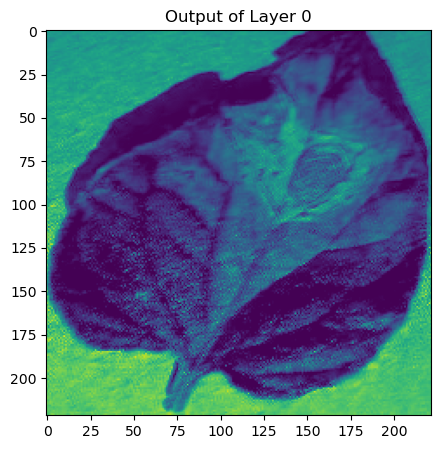

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K

# Load the model
#model = load_model("your_model_path.h5")

# Choose the layer index you want to visualize
layer_index = 0  # Change this to the index of the layer you want to visualize

# Load the image and preprocess it
#img_path = "path_to_your_image.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Function to get the output of an intermediate layer
get_layer_output = K.function([model.layers[0].input], [model.layers[layer_index].output])
layer_output = get_layer_output([img_array])[0]

# Display the output of the intermediate layer
plt.figure(figsize=(10, 5))
plt.imshow(layer_output[0, :, :, 0], cmap='viridis')  # Adjust the channel index if needed
plt.title(f'Output of Layer {layer_index}')
plt.show()
